In [ ]:
!pip install pycaret==2.0
!pip install pandas-profiling==3.1.0
from pycaret.utils import enable_colab
enable_colab()

     |████████████████████████████████| 261 kB 5.5 MB/s 
     |████████████████████████████████| 303 kB 7.6 MB/s 
     |████████████████████████████████| 3.1 MB 28.5 MB/s 
  Attempting uninstall: tangled-up-in-unicode
    Found existing installation: tangled-up-in-unicode 0.2.0
    Uninstalling tangled-up-in-unicode-0.2.0:
      Successfully uninstalled tangled-up-in-unicode-0.2.0
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 3.2.0
    Uninstalling pandas-profiling-3.2.0:
      Successfully uninstalled pandas-profiling-3.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installe

In [ ]:
#important libraries
import numpy as np 
import pandas as pd

In [ ]:
!wget --no-check-certificate \
    https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

--2022-05-17 08:07:16--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv.2’

winequality-red.csv 100%[===================>]  82.23K  --.-KB/s    in 0.1s    

2022-05-17 08:07:17 (785 KB/s) - ‘winequality-red.csv.2’ saved [84199/84199]



In [ ]:
df1 = pd.read_csv('winequality-red.csv.2', sep=";")

In [ ]:
df1.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
df1.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

↓クラスが不均一なので、4,8,3は無視できる

In [ ]:
df1.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
!pip install pycaret==2.0
!pip install jinja2==2.11.1 
from pycaret.utils import enable_colab
enable_colab()

Colab mode activated.


In [ ]:
from pycaret.classification import *

In [ ]:
session_1 = setup(df1, target = 'quality', session_id=123, log_experiment=False, experiment_name='wine_q1')

Setup Succesfully Completed!


In [ ]:
best_model = compare_models(blacklist=['catboost'])

In [ ]:
models()

Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
xgboost         Extreme Gradient Boosting   
lightgbm  Light Gradient Boosting Machine   
catboost              CatBoost Classifier   

                                            Reference  Turbo  
ID                                                            
lr            sklearn.linear_model.LogisticRegression   True  
knn            sklearn.neighbors.KNeighborsClassifier   True  
nb                     sklearn.naive_bayes.GaussianNB   True  
dt                sklearn.tree.DecisionTreeClassifier   True  
svm                sklearn.linear_model.SGDClassifier   True  
rbfsvm                                sklearn.svm.SVC  False  
gpc                      sklearn.gaussian_process.GPC  False  
mlp              sklearn.neural_network.MLPClassifier  False  
ridge            sklearn.linear_model.RidgeClassifier   True  
rf            sklearn.ensemble.RandomForestClassifier   True  
qda                 sklearn.discriminant_analysis.QDA   True  
ada               sklearn.ensemble.AdaBoostClassifier   True  
gbc       sklearn.ensemble.GradientBoostingClassifier   True  
lda                 sklearn.discriminant_analysis.LDA   True  
et              sklearn.ensemble.ExtraTreesClassifier   True  
xgboost                        xgboost.readthedocs.io   True  
lightgbm                github.com/microsoft/LightGBM   True  
catboost                                  catboost.ai   True

In [ ]:
#creating random forest model
rf = create_model('rf')

In [ ]:
#creating Extra Trees Classifier
et = create_model('et')

In [ ]:
#light GBM Model
lgbm = create_model('lightgbm')

In [ ]:
#creating XGB model
xgboost = create_model('xgboost')

In [ ]:
#Hyper params tuning via tune_model
tuned_rf = tune_model(rf)

In [ ]:
tuned_rf

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=20,
                                                     max_features='log2',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=4,
                                                     min_samples_split=7,
                                                     min_weight_fraction_leaf=0.0,
                                          

In [ ]:
tuned_et = tune_model(et)

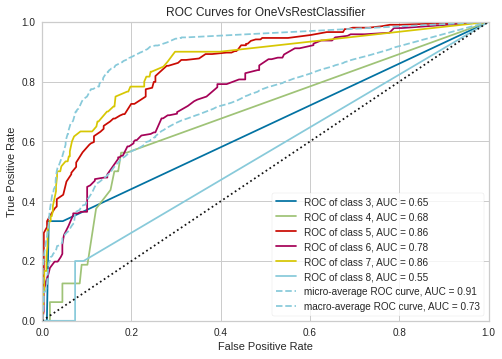

In [ ]:
plot_model(rf)

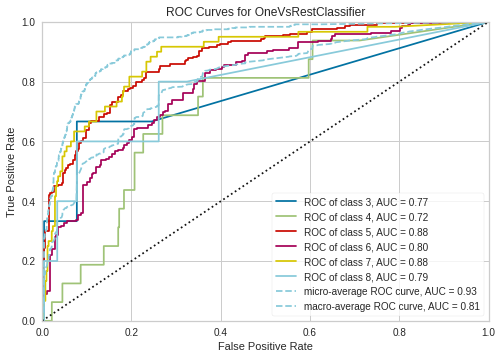

In [ ]:
plot_model(tuned_rf)

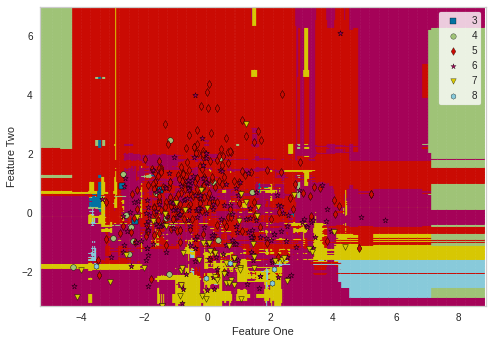

In [ ]:
plot_model(rf, plot = 'boundary')

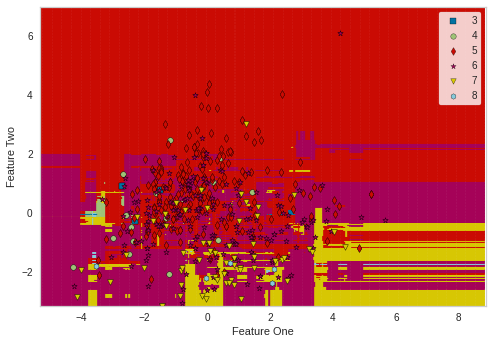

In [ ]:
plot_model(tuned_rf, plot = 'boundary')

In [ ]:
from imblearn.over_sampling import *
adasyn1 = ADASYN(sampling_strategy='minority')


In [ ]:
Session_2 = setup(df1, target = 'quality', session_id=177, log_experiment=False, 
                  experiment_name='wine_q2', normalize=True, normalize_method='zscore', 
                  transformation=True, transformation_method = 'quantile', fix_imbalance=True,
                  fix_imbalance_method= adasyn1)

Setup Succesfully Completed!


In [ ]:
best_model1 = compare_models(blacklist=['catboost'])

In [ ]:
xgboost_1 = create_model('xgboost')

In [ ]:
et_1 = create_model('et')

In [ ]:
lgbm_1 = create_model('lightgbm')

In [ ]:
gbc_1 = create_model('gbc')

In [ ]:
tuned_xgboost1 = tune_model(xgboost_1)

In [ ]:
tuned_lgbm1 = tune_model(lgbm_1)

In [ ]:
tuned_et1 = tune_model(et_1)

In [ ]:
tuned_gbc1 = tune_model(gbc_1)

In [ ]:
blend_soft = blend_models(estimator_list = [tuned_lgbm1, tuned_xgboost1, tuned_gbc1, tuned_et1], method = 'soft')

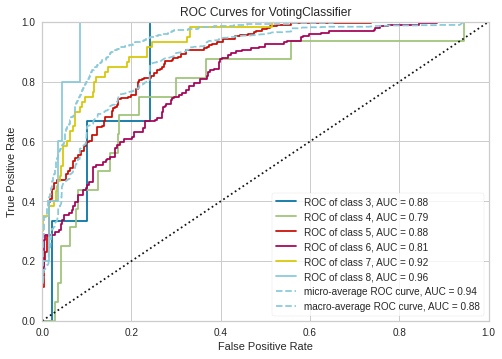

In [ ]:
plot_model(blend_soft)

In [ ]:
stacked_lgbm = stack_models(estimator_list = [tuned_lgbm1, tuned_xgboost1, tuned_gbc1, tuned_et1], meta_model=lgbm_1)

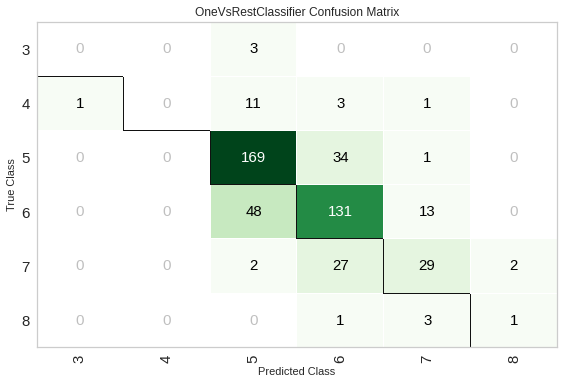

In [ ]:
plot_model(lgbm_1, plot = 'confusion_matrix')

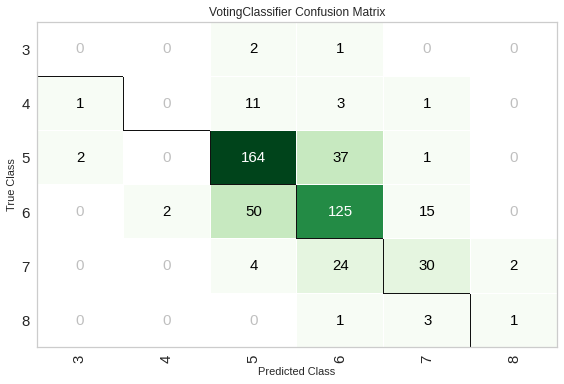

In [ ]:
plot_model(blend_soft, plot = 'confusion_matrix')

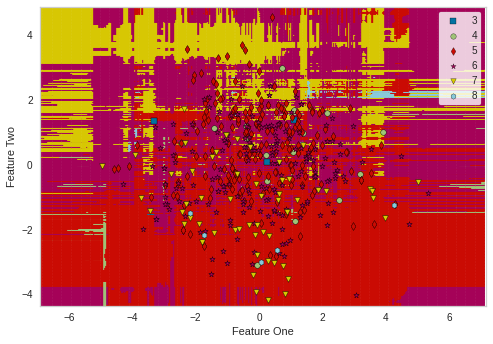

In [ ]:
plot_model(blend_soft, plot = 'boundary')

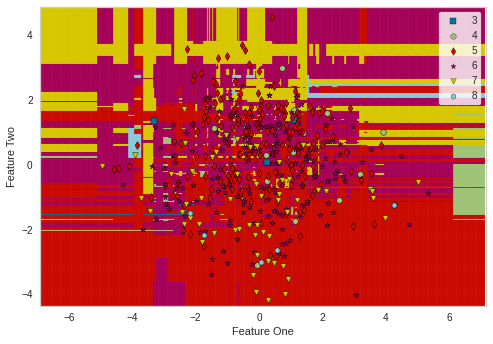

In [ ]:
plot_model(lgbm_1, plot = 'boundary')

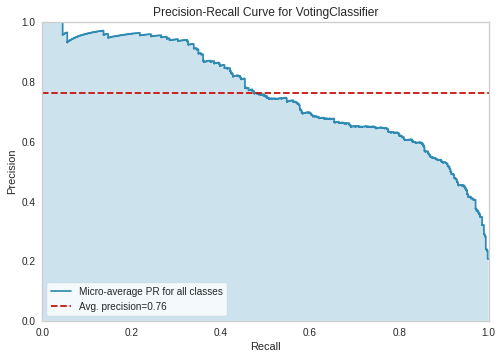

In [ ]:
plot_model(blend_soft, plot = 'pr')

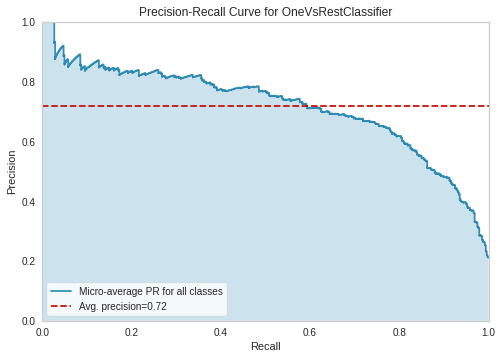

In [ ]:
plot_model(lgbm_1, plot = 'pr')

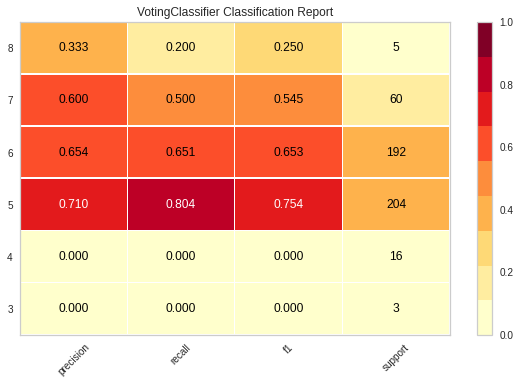

In [ ]:
plot_model(blend_soft, plot = 'class_report')

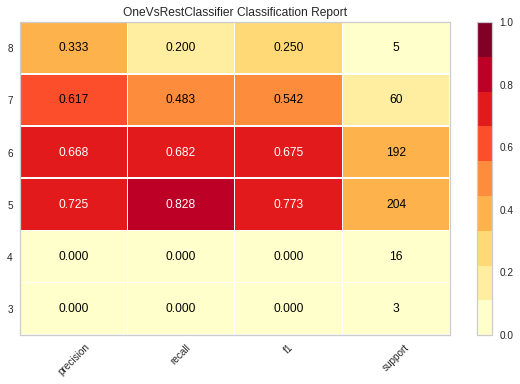

In [ ]:
plot_model(lgbm_1, plot = 'class_report')

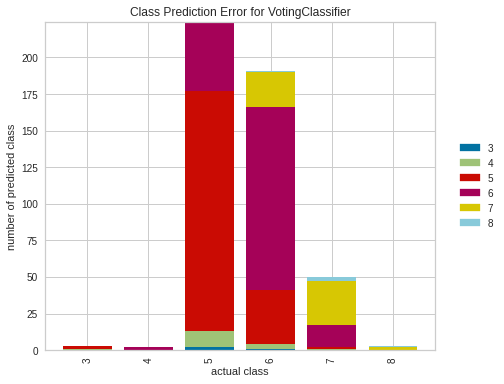

In [ ]:
plot_model(blend_soft, plot = 'error')

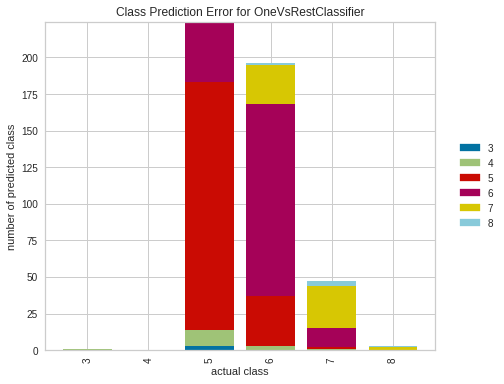

In [ ]:
plot_model(lgbm_1, plot = 'error')

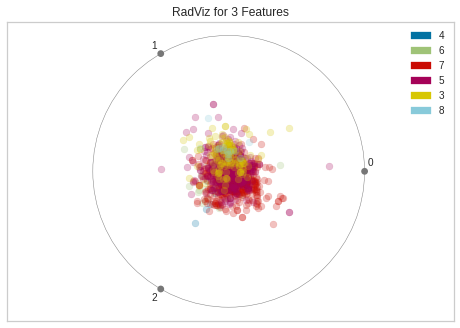

In [ ]:
plot_model(lgbm_1, plot = 'dimension')